t7


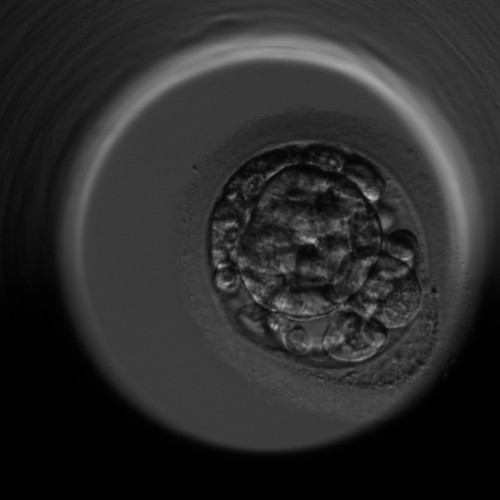

In [9]:
import os
import random
from PIL import Image

data_folder = "data/val"


categories = os.listdir(data_folder)
categories.sort()
category = random.choice(categories)
print(category)

images = os.listdir(data_folder + "/" + category)
image = random.choice(images)
embryo = Image.open(data_folder + "/" + category + "/" + image)
embryo = embryo.convert('RGB')
embryo

In [1]:
import tensorflow as tf
from model import EmbryoClassifier

model = EmbryoClassifier(num_classes=16)
model.load()


2024-05-09 20:27:46.676922: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-09 20:27:46.728442: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-09 20:27:48.397367: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input

image = np.array(embryo)
image = tf.image.resize(image, [256, 256])
image = preprocess_input(tf.expand_dims(image, axis=0))
pred = model(image).numpy()[0]
pred = categories[np.argmax(pred)]

print(f"Predicted Category: {pred}")

Predicted Category: tSB


In [13]:
!python -m pip install scipy

     |████████████████████████████████| 38.6 MB 6.0 MB/s eta 0:00:01


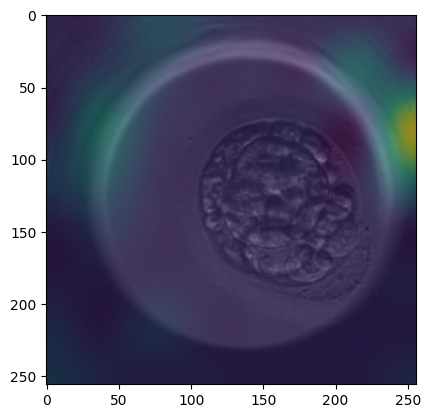

In [14]:
from heatmap import generate_heatmap

import matplotlib.pyplot as plt
from scipy.ndimage import zoom

gradcam = generate_heatmap(model, image)
scale = 256 / gradcam.shape[0]
plt.imshow(embryo.resize((256, 256)))
plt.imshow(zoom(gradcam, zoom=(scale, scale)), alpha=0.5)